<a href="https://colab.research.google.com/github/FIRDAYUNITASARI/Backpropagation-Crude-Oil-Price/blob/main/Backpropagation_Crude_Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data = '/content/drive/MyDrive/crude_oil.csv'
data = pd.read_csv(data)
data['Date'] = pd.to_datetime(data['Date'])
df = data[['Date', 'Price']]
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Price
0,2023-09-20,90.40
1,2023-09-19,90.48
2,2023-09-18,90.58
3,2023-09-15,90.77
4,2023-09-14,90.16
...,...,...
263,2022-09-26,76.71
264,2022-09-23,78.74
265,2022-09-22,83.49
266,2022-09-21,82.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    268 non-null    datetime64[ns]
 1   Price   268 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


**normalisasi minmax**

In [ ]:
# Menormalisasi kolom 'Price' dengan Min-Max Scaling
price_min = df['Price'].min()
price_max = df['Price'].max()
df['Price'] = (df['Price'] - price_min) / (price_max - price_min)

# Menampilkan DataFrame yang telah dinormalisasi
print("\nData setelah normalisasi:")
df



Data setelah normalisasi:


<ipython-input-13-e51e72c1158f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = (df['Price'] - price_min) / (price_max - price_min)


,Date,Price
0,2023-09-20,0.913514
1,2023-09-19,0.916602
2,2023-09-18,0.920463
3,2023-09-15,0.927799
4,2023-09-14,0.904247
...,...,...
263,2022-09-26,0.384942
264,2022-09-23,0.463320
265,2022-09-22,0.646718
266,2022-09-21,0.625483


In [ ]:
import numpy as np

# Misalnya df adalah DataFrame yang berisi kolom 'Price'
data = df['Price'].values  # Mengambil kolom 'Price' sebagai array

# Fungsi untuk mengonversi data menjadi seri waktu dengan X=30
def create_time_series(data, X=30): #30 berarti 1 bulan
    X_data, y_data = [], []
    for i in range(len(data) - X):
        X_data.append(data[i:i+X])  # Menyimpan data input (X values)
        y_data.append(data[i+X])    # Menyimpan data target (y value)
    return np.array(X_data), np.array(y_data)

# Mengonversi kolom 'Price' menjadi data seri waktu dengan X=30
X_data, y_data = create_time_series(data, X=30)

# Membagi data menjadi 70% untuk training dan 30% untuk testing
train_size = int(len(X_data) * 0.7)  # 70% untuk training
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Menampilkan hasil pembagian data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Memastikan X_train dan X_test memiliki 3 dimensi dengan menambahkan dimensi tambahan
X_train = np.expand_dims(X_train, axis=-1)  # Menambahkan dimensi ketiga (misalnya timesteps atau features)
X_test = np.expand_dims(X_test, axis=-1)    # Menambahkan dimensi ketiga

X_train shape: (166, 30)
X_test shape: (72, 30)
y_train shape: (166,)
y_test shape: (72,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

# Membangun model neural network dengan Keras
model = keras.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),  # Flatten input untuk ke layer dense
    layers.Dense(64, activation='relu'),  # Hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
    layers.Dense(1, activation='sigmoid')  # Output layer dengan fungsi aktivasi sigmoid (untuk regresi)
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Mengevaluasi model pada data testing
loss = model.evaluate(X_test, y_test)

# Menampilkan hasil evaluasi
print(f"Loss pada data test: {loss}")

# Prediksi pada data test
y_pred = model.predict(X_test)

# Denormalisasi hasil prediksi dan data target
ypred = price_min + (y_pred * (price_max - price_min))
ytest = price_min + (y_test * (price_max - price_min))

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(ytest, ypred)
print(f"MAPE: {mape * 100:.2f}%")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0587  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0340 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255 
Epoch 16/100
6/6 ━━━━━━━━━━━━━

**PLOTTING**

In [ ]:
ypred.shape, ytest.shape

((72, 1), (72,))

In [ ]:
# Mengambil Date yang sesuai dengan data test (dimulai dari train_size)
tanggal = train_size+30
date_test = df['Date'].iloc[tanggal:].reset_index(drop=True)
date_test.shape

(72,)

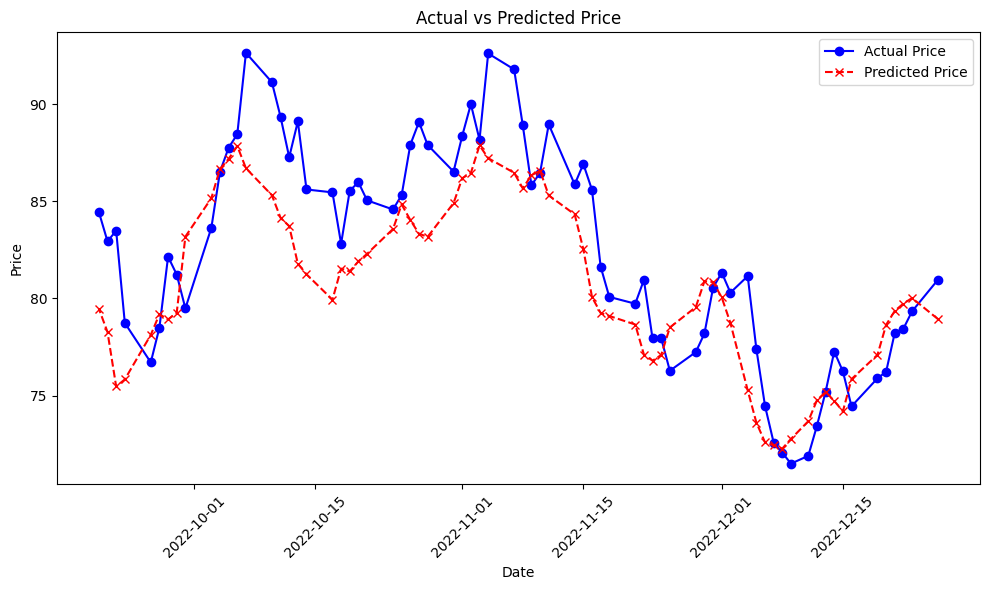

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ambil ytest sesuai dengan data yang sudah dibagi (test set)
# ytest sudah sesuai dengan data yang digunakan untuk pengujian
ytest = price_min + (y_test * (price_max - price_min))  # Denormalisasi y_test jika belum

# Pastikan y_pred sesuai dengan ukuran ytest
ypred = price_min + (y_pred * (price_max - price_min))  # Denormalisasi y_pred jika belum

# Plotting hasil prediksi vs data target (denormalisasi)
plt.figure(figsize=(10, 6))
plt.plot(date_test, ytest, label="Actual Price", color='blue', linestyle='-', marker='o')
plt.plot(date_test, ypred, label="Predicted Price", color='red', linestyle='--', marker='x')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label sumbu x jika diperlukan agar tidak tumpang tindih
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()
